# Cars24 is one of the leading used-car buying and selling platform in India.

### **1.1 Imports**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### **1.2 Load Dataset**

In [2]:
input_file = "./Workspace/PythonWorkspace/Python-Machine-Learning-Analysis/Analysis/data/cars24-car-price-cleaned.csv"
#input_file = ""./data/cars24-car-price-cleaned.csv"

In [3]:
df = pd.read_csv(input_file)
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,6.0,TOYOTA,PLATINUM ETIOS 1.4 GXD,0,0,1,0,0,0,1,1,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.0,MARUTI,ERTIGA BSIV VXI,0,0,0,0,0,1,1,0,1
19817,4.25,2015.0,67000,21.14,1498.0,103.52,8.0,SKODA,RAPID 1.5 TDI ELEGANCE,0,0,1,0,0,0,1,1,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.0,MAHINDRA,XUV500 W6 2WD,0,0,1,0,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

Make and Model are not numerical features and we need to convert them to numerical values. How ?

OneHot encoding / Label Encoding / Target Encoding

In [5]:
df['make'].nunique()

41

In [6]:
df['model'].nunique()

3233

OneHot Encoding increases the dimensionality - Make - 41 and Model - 3233

In [7]:
df['make_te'] = df.groupby("make")["selling_price"].transform("mean")
df['model_te'] = df.groupby("model")["selling_price"].transform("mean")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

**Normalizing the data**

In [9]:
df.select_dtypes("object").columns

Index(['make', 'model'], dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns = df.select_dtypes("object").columns)), columns = df.columns.drop(df.select_dtypes("object").columns))
df_scaled

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5,make_te,model_te
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.194048,0.041550
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.232517,0.218382
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.232517,0.149143
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.194048,0.093193
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.252367,0.313574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.484670,0.328028
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.194048,0.330632
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.318156,0.200656
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.324782,0.377671


**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
y = df_scaled["selling_price"]
X = df_scaled.drop(columns= "selling_price")
y.shape, X.shape

((19820,), (19820, 17))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((5946, 17), (13874, 17), (5946,), (13874,))

**Training the Model**

**Single variable**

In [15]:
X1 = X[['model_te']]
X1_train = X_train[['model_te']]
X1_test = X_test[['model_te']]

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)
print(model.coef_)
print(model.intercept_)

[0.9967642]
0.0015237505846132926


In [17]:
model.predict(X1)

array([0.04293954, 0.21919884, 0.15018463, ..., 0.20153052, 0.37797252,
       0.51930761])

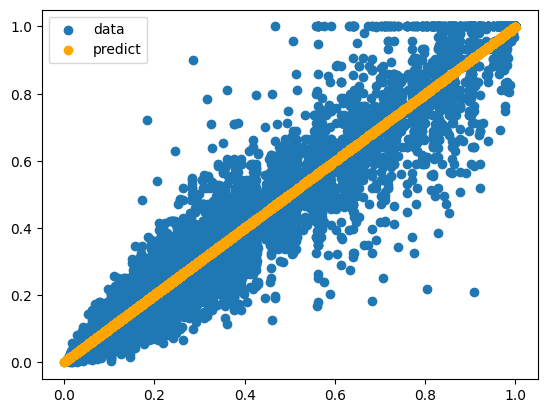

In [18]:
y_hat = model.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label = 'data')
plt.scatter(X1,y_hat,color = 'orange', label = 'predict')
plt.legend()
plt.show()

**For All variables**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 7.24505255e+11 -2.49755859e-01 -2.32287097e-01  7.44248837e-02
  4.69365665e-02  7.24505255e+11 -7.23177948e-03 -7.15141607e-03
  6.94566417e-03  1.33001908e-01  1.50175613e-02 -6.86955568e-03
 -3.79558700e-03 -1.62488438e-02 -2.35550955e-02  6.63439251e-02
  8.58623808e-01]
-724505254970.7954


**Model Evaluation**
R**2

In [20]:
model.score(X_train, y_train)

0.9459014629757724

In [21]:
model.score(X_test, y_test)

0.9459856947928624

**Feature Importance**

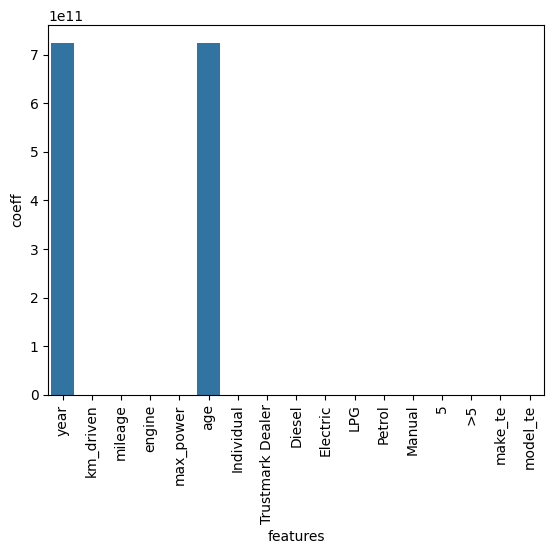

In [22]:
imp = pd.DataFrame(list(zip(X_test.columns, np.abs(model.coef_))), columns = ['features', 'coeff'])
sns.barplot(x= 'features', y = 'coeff', data = imp)
plt.xticks(rotation = 90)
plt.show()

## **Linear Regression from Scratch**

In [23]:
import numpy as np

In [24]:
class LinearRegression():
    def __init__(self, learning_rate = 0.01, iterations = 5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [25]:
def predict(self, X):
    return np.dot(X, self.w) + self.b

LinearRegression.predict = predict

In [26]:
def r2_score(self, X, y):
    y_ = predict(self,X)
    ss_res = np.sum((y-y_)**2)
    ss_total = np.sum((y - y.mean())**2)
    score = (1 - ss_res/ss_total)
    return score

LinearRegression.score= r2_score

In [27]:
def update_weights(self):
    y_pred = self.predict(self.X)
    dw = - (2 * (self.X.T).dot(self.y - y_pred))/self.m
    db = -2 * np.sum(self.y - y_pred)/self.m
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
    return self

LinearRegression.update_weights = update_weights

In [28]:
def fit(self, X, y):
    self.m, self.d = X.shape
    self.w = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.y = y
    self.error_list = []
    for i in range(self.iterations):
        self.update_weights()
        y_pred = X.dot(self.w) + self.b
        error = np.square(np.subtract(y, y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit = fit


**Plotting the Error list**

In [29]:
lr = LinearRegression(iterations=100)
lr.fit(X_train,y_train)
lr.predict(X_test)
lr.score(X_train,y_train)


0.4403014437156555

In [30]:
lr.b

0.091390661589401

In [31]:
lr.w

year                0.088474
km_driven           0.000682
mileage             0.007028
engine              0.039473
max_power           0.036066
age                 0.002917
Individual         -0.009215
Trustmark Dealer    0.000555
Diesel              0.089037
Electric            0.000248
LPG                -0.000746
Petrol              0.003628
Manual             -0.023404
5                   0.040467
>5                  0.045181
make_te             0.079719
model_te            0.116198
dtype: float64

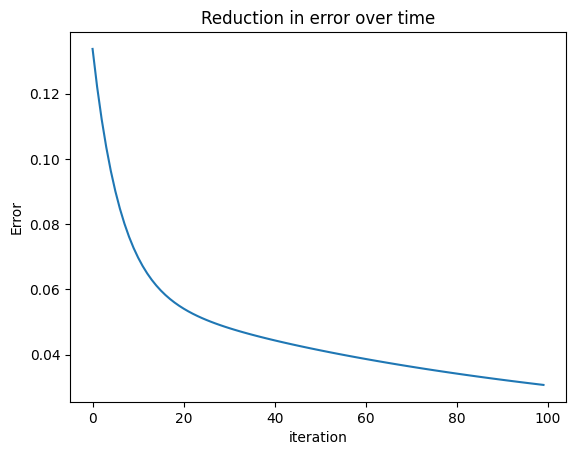

In [32]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [33]:
y_hat = lr.predict(X_test)
m = len(y_test)
d = X_test.shape[1]
r2_score = lr.score(X_test, y_test)
Adj_R = 1 - ((1-r2_score)*(m-1)/(m-20-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.4386590531265625


**Stats Models**

In [34]:
import statsmodels.api as sm

In [35]:
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        06:10:45   Log-Likelihood:                 20683.
No. Observations:               13874   AIC:                        -4.133e+04
Df Residuals:                   13857   BIC:                        -4.120e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.729e+11   1.16e+11     -5.801      0.000      -9e+11   -4.45e+11
year              6.729e+11   1.16e+11      5.801      0.000    4.45e+11       9e+11
km_driven           -0.2498      0.035     -7.099      0.000      -0.319      -0.181
mileage             -0.2334      0.022    -10.580      0.000      -0.277      -0.190
engine               0.0741      0.015      4.972      0.000       0.045       0.103
max_power            0.0471      0.014      3.272      0.001       0.019       0.075
age               6.729e+11   1.16e+11      5.801      0.000    4.45e+11       9e+11
Individual          -0.0072      0.001     -7.306      0.000      -0.009      -0.005
Trustmark Dealer    -0.0069      0.005     -1.442      0.149      -0.016       0.002
Diesel               0.0069      0.004      1.751      0.080      -0.001       0.015
Electric             0.1328      0.024      5.477      0.000       0.085       0.180
LPG                  0.0151      0.009      1.683      0.092      -0.002       0.033
Petrol              -0.0069      0.004     -1.695      0.090      -0.015       0.001
Manual              -0.0036      0.002     -2.289      0.022      -0.007      -0.001
5                   -0.0162      0.004     -3.773      0.000      -0.025      -0.008
>5                  -0.0235      0.005     -5.069      0.000      -0.033      -0.014
make_te              0.0661      0.005     14.133      0.000       0.057       0.075
model_te             0.8589      0.005    169.902      0.000       0.849       0.869
==============================================================================
Omnibus:                     2591.569   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57429.765
Skew:                           0.284   Prob(JB):                         0.00
Kurtosis:                      12.951   Cond. No.                     8.64e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Variation Inflation Factor**

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train, columns = X_train.columns)
vif["Features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [41]:
cols2 = vif["Features"][1:].values

In [42]:
cols2

array(['age', 'Petrol', 'Diesel', '>5', '5', 'engine', 'model_te',
       'max_power', 'make_te', 'mileage', 'Manual', 'LPG', 'km_driven',
       'Electric', 'Individual', 'Trustmark Dealer'], dtype=object)

In [43]:
X2 = pd.DataFrame(X_train, columns = X_train.columns)[cols2]
X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        06:33:47   Log-Likelihood:                 20667.
No. Observations:               13874   AIC:                        -4.130e+04
Df Residuals:                   13857   BIC:                        -4.117e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1144      0.009  

In [45]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X2, columns=X2.columns)
vif["Features"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif


,Features,VIF
4,5,50.02
5,engine,48.28
2,Diesel,29.78
7,max_power,26.73
1,Petrol,24.87
9,mileage,22.34
6,model_te,16.79
8,make_te,11.72
3,>5,10.77
10,Manual,8.82
